# Data Mining With a Machine Learning Approach for Customers Churn and Behavior Prediction in Mobile Telecommunication

####  -Develop a more accurate customer churn and behavior prediction using data mining with a machine learning approach -

## (I) Churn Prediction 

## Contents

    1. Data Preprocessing
    2. Understand the features & the target (Feature Engineering)
    3. Feature preprocessing
    4. Model Training 
    5. Results Evaluation

#### import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import scipy.stats as stats
import sklearn
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split


# Handle missing values
from sklearn.impute import SimpleImputer

# K-S test
import scipy
from scipy.stats import ks_2samp

# propotiona Z -test
from statsmodels.stats.proportion import proportions_ztest

#for numeric data representation
import seaborn as sns

#for imbalancing data
from imblearn.over_sampling import SMOTE
smote =SMOTE()
from collections import Counter

#### Load dataset 

In [2]:
df = pd.read_csv('telecommunication_cx_churn_prediction Dataset.csv')

#### Attributes 

In [3]:
for i,col in enumerate(df.columns):
    print(i+1,": ",col)

1 :  nic
2 :  monthly_bill
3 :  billing_complaint_resolve_time
4 :  billing_complaint_count
5 :  promotions
6 :  hotline_call_time
7 :  hotline_call_count
8 :  archade_visit_time
9 :  archade_visit_waiting_time
10 :  archade_visit_count
11 :  negative_ratings_cx_sent
12 :  positive_ratings_cx_sent
13 :  complaint_resolve_duration
14 :  total_complaints
15 :  complaint_breach_count
16 :  coverage_related_complaint_duration
17 :  coverage_related_complaint_count
18 :  adjustment_charges
19 :  download_bandwidth
20 :  downloaded_data
21 :  data_charges
22 :  churn


#### Data types of attributes 

In [4]:
df.dtypes

nic                                     object
monthly_bill                           float64
billing_complaint_resolve_time          object
billing_complaint_count                float64
promotions                             float64
hotline_call_time                       object
hotline_call_count                     float64
archade_visit_time                     float64
archade_visit_waiting_time             float64
archade_visit_count                    float64
negative_ratings_cx_sent                 int64
positive_ratings_cx_sent                 int64
complaint_resolve_duration              object
total_complaints                       float64
complaint_breach_count                 float64
coverage_related_complaint_duration     object
coverage_related_complaint_count         int64
adjustment_charges                      object
download_bandwidth                     float64
downloaded_data                         object
data_charges                            object
churn        

## 1. Data Pre-processing

### 1.1 Cleaning Data

#### 1.1.1 Missing Values 

In [5]:
df.isnull().values.any()

True

In [6]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

The dataframe has 22 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values  \
churn                                             2                0.1   
billing_complaint_resolve_time                    1                0.1   
billing_complaint_count                           1                0.1   
promotions                                        1                0.1   
hotline_call_time                                 1                0.1   
hotline_call_count                                1                0.1   
archade_visit_time                                1                0.1   
archade_visit_waiting_time                        1                0.1   
archade_visit_count                               1                0.1   
complaint_resolve_duration                        1                0.1   
total_complaints                                  1                0.1   
complaint_breach_count                            1                0.1   
coverage_related_complaint_duration               1                0.1   
download_bandwidth                                1                0.1   

                                        type  
churn                                float64  
billing_complaint_resolve_time        object  
billing_complaint_count              float64  
promotions                           float64  
hotline_call_time                     object  
hotline_call_count                   float64  
archade_visit_time                   float64  
archade_visit_waiting_time           float64  
archade_visit_count                  float64  
complaint_resolve_duration            object  
total_complaints                     float64  
complaint_breach_count               float64  
coverage_related_complaint_duration   object  
download_bandwidth                   float64

#### Use drop and fill methods to treat missing values 

In [8]:
for col in df.columns:
    #drop rows having more than half missing values in the dataset (Dont Keep rows with more than 10 missing values.)
    df.dropna(thresh=10,how='all', inplace = True)

    #fill the missing values with the median value of the entier attribute values.
    df.fillna(df.median(), inplace= True)
    
    # drop rows having null values for churn attribute
    df.dropna(subset=['churn'],how='all', inplace = True)

In [9]:
df.isnull().values.any()

False

#### 1.1.2 Drop unique columns

In [10]:
#drop unique attributes
#nic is a unique attribute which is not necessary for the predictions
df.drop(columns="nic", inplace = True)

#### 1.1.3. Impute Nan values 

In [11]:
imputer= SimpleImputer(missing_values=np.nan, strategy="mean")

#### 1.1.4.Remove spaces and commas

In [12]:
for col_name in df.columns:
    df.columns.str.strip()

In [13]:
for col_name in df.columns:
    if df[col_name].dtype==object:
        df[col_name]=df[col_name].str.replace(',' , ' ')
        

In [14]:
df.head()

monthly_bill billing_complaint_resolve_time  billing_complaint_count  \
0      10681.29                              0                      0.0   
1       3994.01                              0                      0.0   
2       4597.82                              0                      0.0   
3       1614.54                           0.13                      1.0   
5        909.70                          30.78                      1.0   

   promotions hotline_call_time  hotline_call_count  archade_visit_time  \
0       114.0       113.8611111                22.0               22.70   
1        73.0       439.6428571                18.0                0.00   
2        47.0                 0                 0.0                0.00   
3        86.0             566.3                15.0                0.00   
5        39.0               390                 3.0                9.08   

   archade_visit_waiting_time  archade_visit_count  negative_ratings_cx_sent  \
0                        0.48                  2.0                        10   
1                        0.00                  0.0                         0   
2                        0.00                  0.0                         0   
3                        0.00                  0.0                         0   
5                        0.11                  2.0                         0   

   positive_ratings_cx_sent complaint_resolve_duration  total_complaints  \
0                         6                      54.31               1.0   
1                         3                      71.82               1.0   
2                         0                8.053333333               3.0   
3                         0                   2 621.76               1.0   
5                         0                      30.78               1.0   

   complaint_breach_count coverage_related_complaint_duration  \
0                     0.0                                   0   
1                     0.0                               71.82   
2                     0.0                                   0   
3                     1.0                            2 621.76   
5                     0.0                                   0   

   coverage_related_complaint_count adjustment_charges  download_bandwidth  \
0                                 0             214.77                4.73   
1                                 1                595               12.96   
2                                 0                  0                4.84   
3                                 1               44.9                0.00   
5                                 0             344.24                0.00   

  downloaded_data data_charges  churn  
0        1 748.37       308.48    0.0  
1            0.99         1.42    0.0  
2          688.83       287.57    0.0  
3           31.39        42.36    0.0  
5          227.85        35.54    0.0

### 1.2 Data Encoding 

#### Numeric attributes

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print("Number of numeric columns -" ,len(numeric_cols))

['monthly_bill' 'billing_complaint_count' 'promotions'
 'hotline_call_count' 'archade_visit_time' 'archade_visit_waiting_time'
 'archade_visit_count' 'negative_ratings_cx_sent'
 'positive_ratings_cx_sent' 'total_complaints' 'complaint_breach_count'
 'coverage_related_complaint_count' 'download_bandwidth' 'churn']
Number of numeric columns - 14


#### Non numeric attributes

In [16]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
print("Number of non numeric columns - " ,len(non_numeric_cols))

['billing_complaint_resolve_time' 'hotline_call_time'
 'complaint_resolve_duration' 'coverage_related_complaint_duration'
 'adjustment_charges' 'downloaded_data' 'data_charges']
Number of non numeric columns -  7


#### Uniques categories in data of non-numeric attributes

In [17]:
for col_name in df.columns:
    if df[col_name].dtypes=="object":
        unique_cat=len(df[col_name].unique())
        print("feature '{col_name}'has {unique_cat} unique categoires".format(
        col_name=col_name,unique_cat=unique_cat))

feature 'billing_complaint_resolve_time'has 603 unique categoires
feature 'hotline_call_time'has 1607 unique categoires
feature 'complaint_resolve_duration'has 1257 unique categoires
feature 'coverage_related_complaint_duration'has 208 unique categoires
feature 'adjustment_charges'has 843 unique categoires
feature 'downloaded_data'has 1198 unique categoires
feature 'data_charges'has 1007 unique categoires


since these non numeric attributes have considerble more unique categories in thier data set, using dummies variabels to convert non-numeric data to numeric form is not reliable.

#### Convert all attributes to int datatype  

Since data models work well with numeric data, all the data points in the dataset are converted into int type

In [18]:
for col_name in df.columns:
    if df[col_name].dtype==np.number:
        df[col_name] = df[col_name].astype(int)
        continue
    df[col_name] =pd.to_numeric(df[col_name],errors='coerce').fillna(0)
    df[col_name] = df[col_name].astype(int)

In [19]:
df.dtypes

monthly_bill                           int32
billing_complaint_resolve_time         int32
billing_complaint_count                int32
promotions                             int32
hotline_call_time                      int32
hotline_call_count                     int32
archade_visit_time                     int32
archade_visit_waiting_time             int32
archade_visit_count                    int32
negative_ratings_cx_sent               int32
positive_ratings_cx_sent               int32
complaint_resolve_duration             int32
total_complaints                       int32
complaint_breach_count                 int32
coverage_related_complaint_duration    int32
coverage_related_complaint_count       int32
adjustment_charges                     int32
download_bandwidth                     int32
downloaded_data                        int32
data_charges                           int32
churn                                  int32
dtype: object

In [20]:
df.head()

monthly_bill  billing_complaint_resolve_time  billing_complaint_count  \
0         10681                               0                        0   
1          3994                               0                        0   
2          4597                               0                        0   
3          1614                               0                        1   
5           909                              30                        1   

   promotions  hotline_call_time  hotline_call_count  archade_visit_time  \
0         114                113                  22                  22   
1          73                439                  18                   0   
2          47                  0                   0                   0   
3          86                566                  15                   0   
5          39                390                   3                   9   

   archade_visit_waiting_time  archade_visit_count  negative_ratings_cx_sent  \
0                           0                    2                        10   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
5                           0                    2                         0   

   positive_ratings_cx_sent  complaint_resolve_duration  total_complaints  \
0                         6                          54                 1   
1                         3                          71                 1   
2                         0                           8                 3   
3                         0                           0                 1   
5                         0                          30                 1   

   complaint_breach_count  coverage_related_complaint_duration  \
0                       0                                    0   
1                       0                                   71   
2                       0                                    0   
3                       1                                    0   
5                       0                                    0   

   coverage_related_complaint_count  adjustment_charges  download_bandwidth  \
0                                 0                 214                   4   
1                                 1                 595                  12   
2                                 0                   0                   4   
3                                 1                  44                   0   
5                                 0                 344                   0   

   downloaded_data  data_charges  churn  
0                0           308      0  
1                0             1      0  
2              688           287      0  
3               31            42      0  
5              227            35      0

### 1.3. Outlier detection

#### Data Distribution

In [21]:
def plot_var1(col_name, full_name, continuous):
    fig, (ax1) = plt.subplots(1, sharex=False, figsize=(10,3))
    
    
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    
    df_new=df
    
      # plot2: counts distribution of the variables after log transformation
   # if continuous:
      #  df_new[col_name] =np.log(df[col_name]+1)
      #  sns.distplot(df[col_name])
      #  plt.show()
  

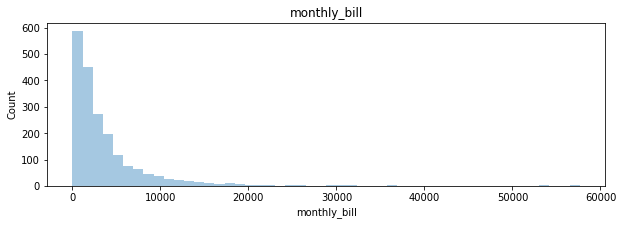

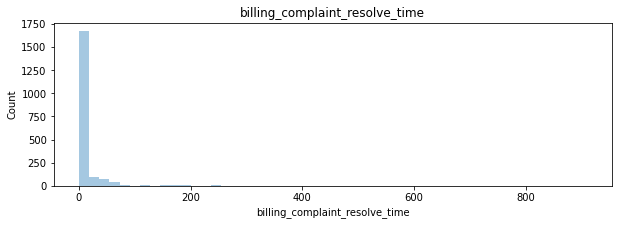

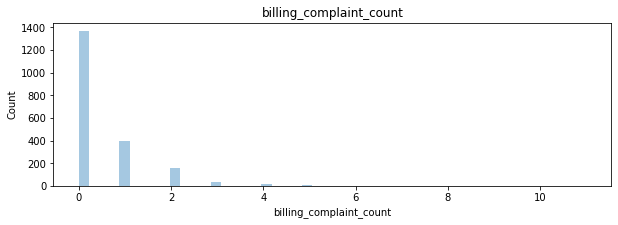

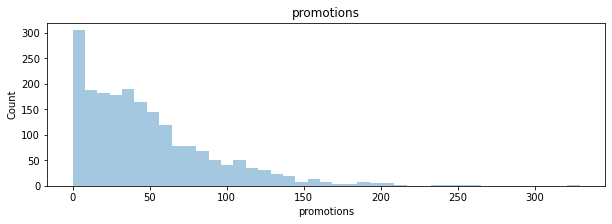

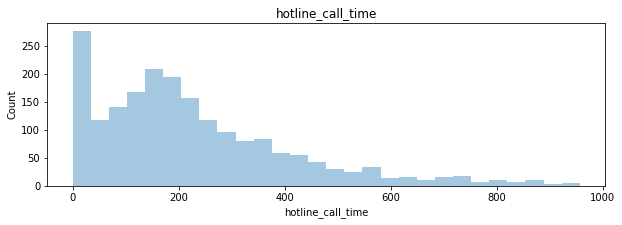

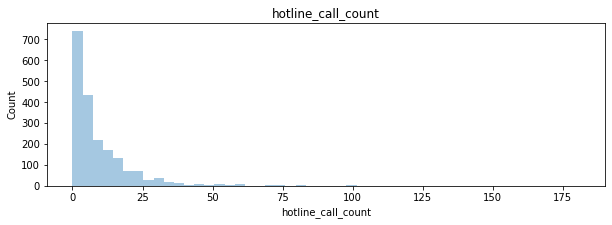

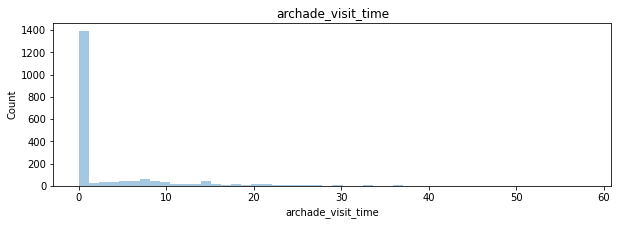

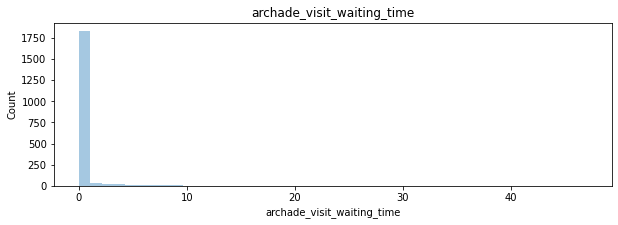

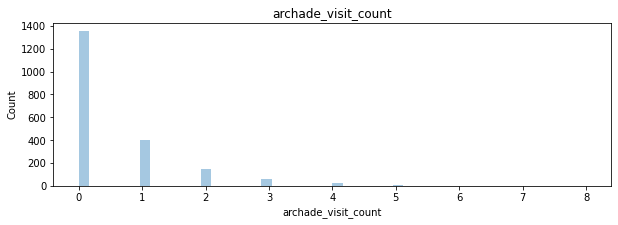

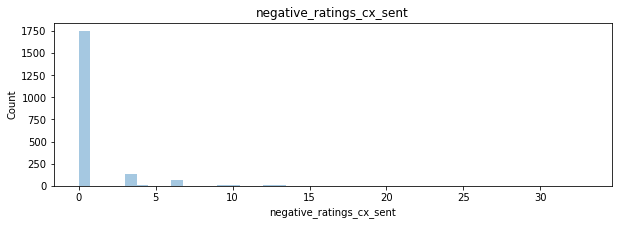

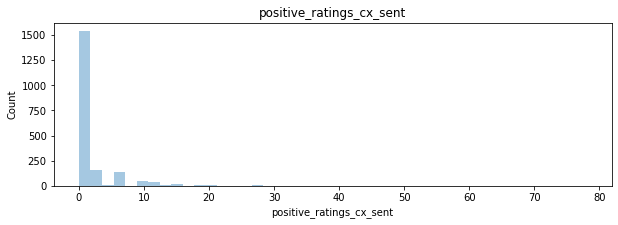

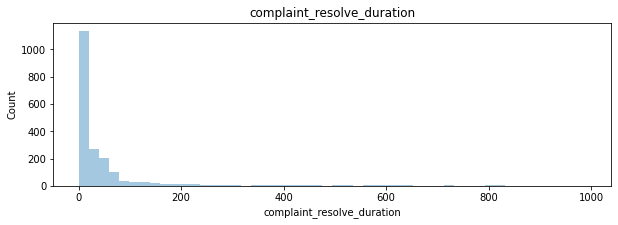

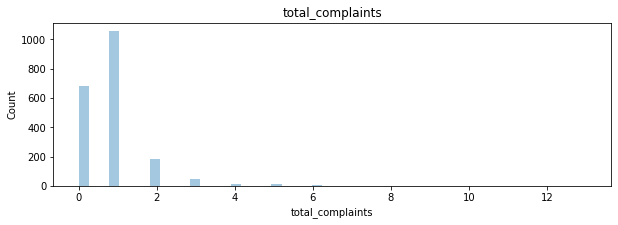

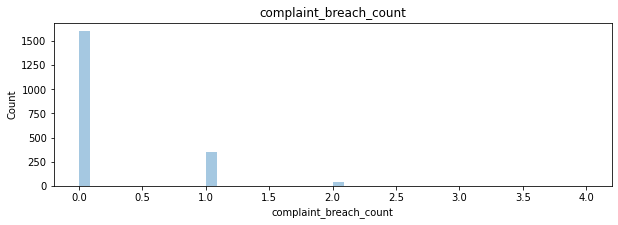

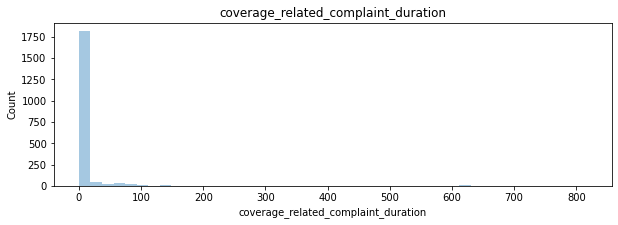

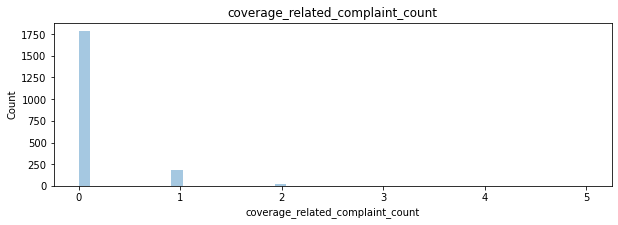

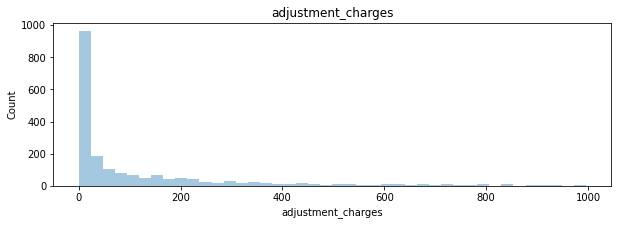

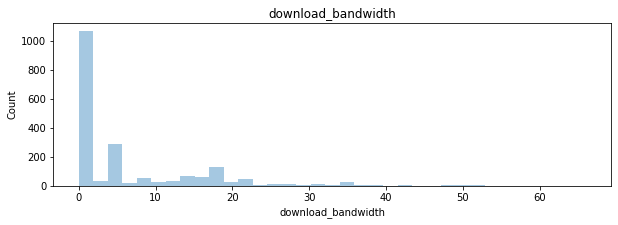

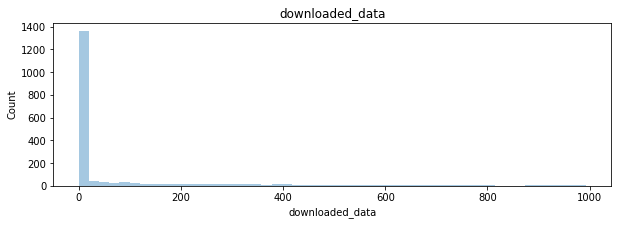

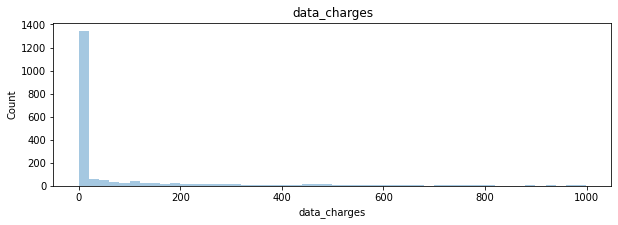

In [22]:
ks_list = ['monthly_bill', 'billing_complaint_resolve_time',
       'billing_complaint_count', 'promotions', 'hotline_call_time',
       'hotline_call_count', 'archade_visit_time',
       'archade_visit_waiting_time', 'archade_visit_count',
       'negative_ratings_cx_sent', 'positive_ratings_cx_sent',
       'complaint_resolve_duration', 'total_complaints',
       'complaint_breach_count', 'coverage_related_complaint_duration',
       'coverage_related_complaint_count', 'adjustment_charges',
       'download_bandwidth', 'downloaded_data', 'data_charges']

for plot_element in ks_list:
    plot_var1(plot_element, plot_element, continuous=True)

#### Boxplot Representation 

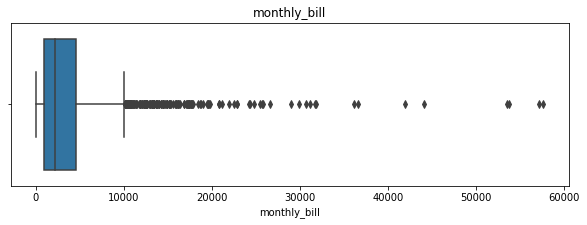

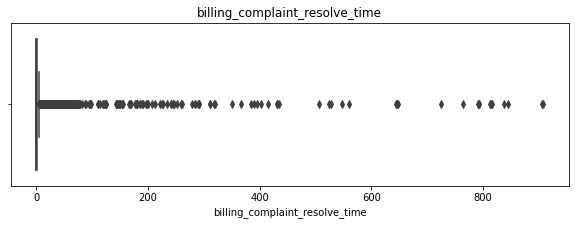

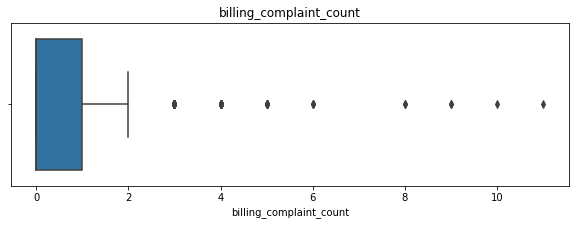

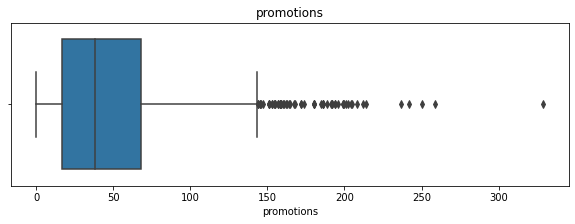

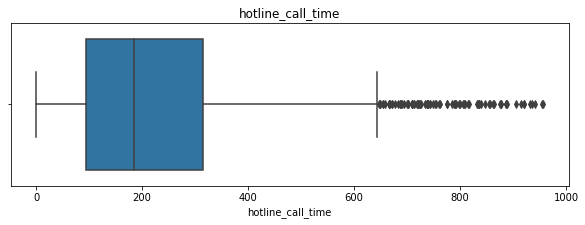

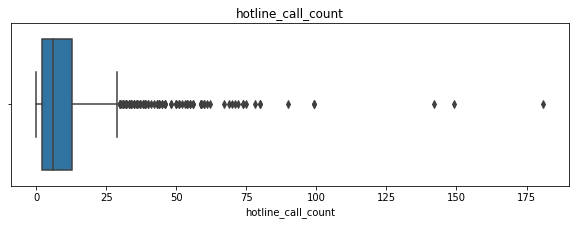

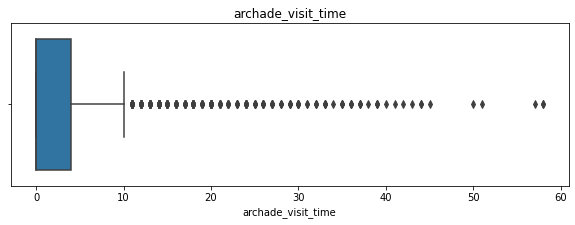

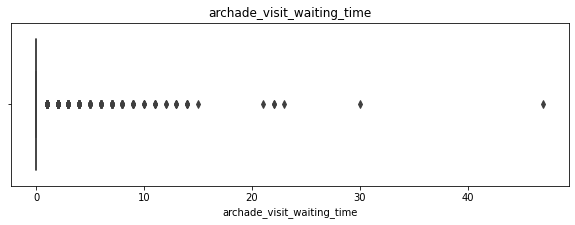

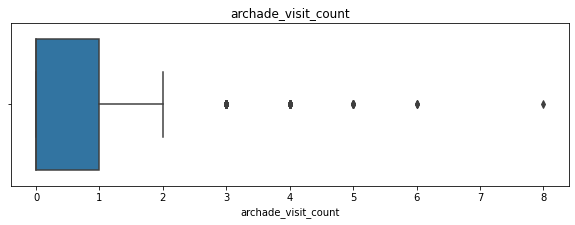

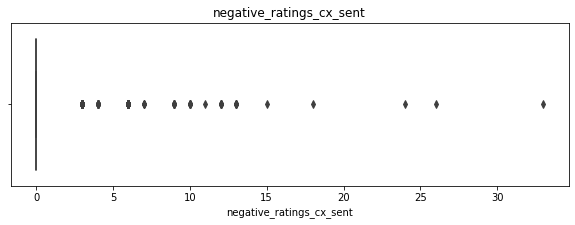

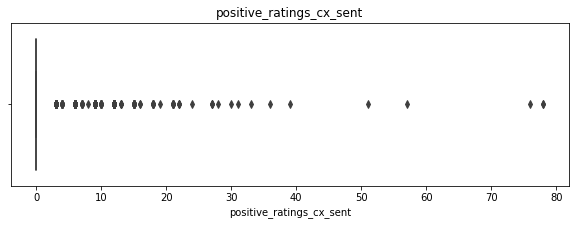

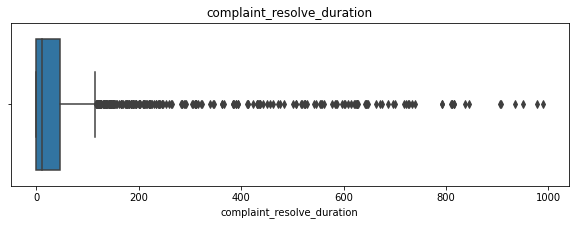

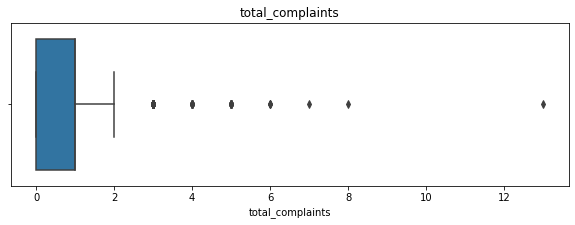

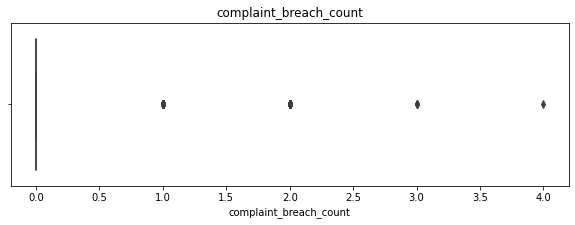

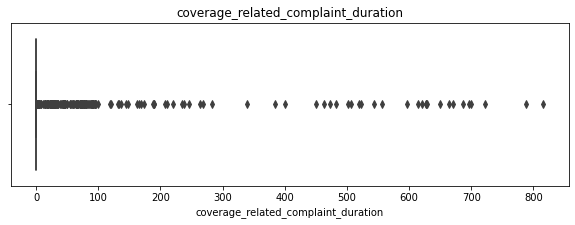

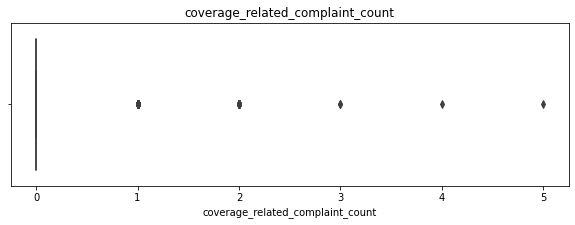

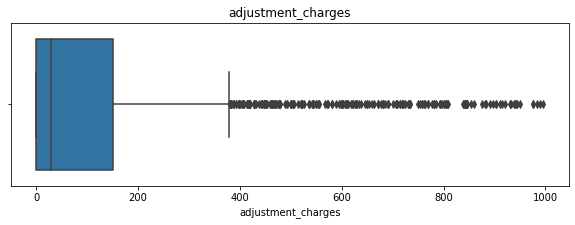

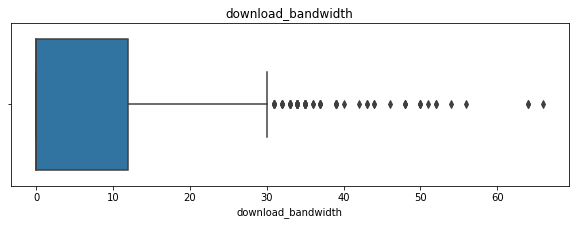

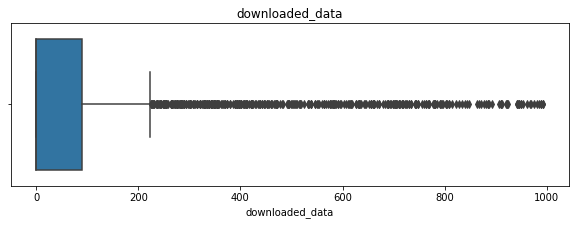

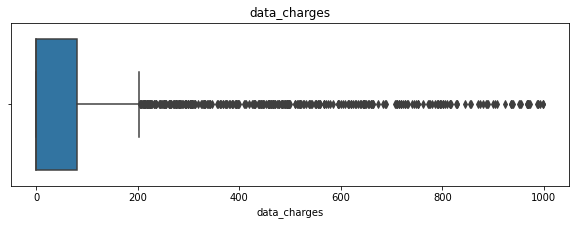

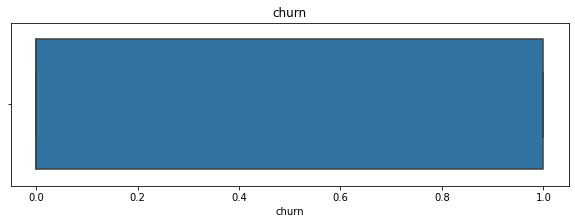

In [23]:
for col_name in df.columns:
    fig, ax2 = plt.subplots(1, sharex=False, figsize=(10,3))
    sns.boxplot(df[col_name], data=df)
    ax2.set_ylabel('')
    ax2.set_title( col_name + '')
    plt.show()
    

From the above representaion of boxplot, found out that there are ouliers present in all the attribute values

#### Details of data 

In [24]:
df.describe()

monthly_bill  billing_complaint_resolve_time  billing_complaint_count  \
count   1998.000000                     1998.000000              1998.000000   
mean    3819.187688                       20.816817                 0.511512   
std     5081.895410                       85.153233                 1.004555   
min       15.000000                        0.000000                 0.000000   
25%      967.750000                        0.000000                 0.000000   
50%     2166.500000                        0.000000                 0.000000   
75%     4589.750000                        2.000000                 1.000000   
max    57639.000000                      908.000000                11.000000   

        promotions  hotline_call_time  hotline_call_count  archade_visit_time  \
count  1998.000000        1998.000000         1998.000000         1998.000000   
mean     48.420921         228.072072            9.764765            3.793794   
std      41.656240         188.922398           13.109978            7.814289   
min       0.000000           0.000000            0.000000            0.000000   
25%      17.000000          95.000000            2.000000            0.000000   
50%      38.000000         185.000000            6.000000            0.000000   
75%      67.750000         315.500000           13.000000            4.000000   
max     329.000000         957.000000          181.000000           58.000000   

       archade_visit_waiting_time  archade_visit_count  \
count                 1998.000000          1998.000000   
mean                     0.515015             0.517518   
std                      2.293560             0.935819   
min                      0.000000             0.000000   
25%                      0.000000             0.000000   
50%                      0.000000             0.000000   
75%                      0.000000             1.000000   
max                     47.000000             8.000000   

       negative_ratings_cx_sent  positive_ratings_cx_sent  \
count               1998.000000               1998.000000   
mean                   0.641642                  1.837838   
std                    2.170662                  5.290152   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                   33.000000                 78.000000   

       complaint_resolve_duration  total_complaints  complaint_breach_count  \
count                 1998.000000       1998.000000             1998.000000   
mean                    56.639139          0.863864                0.223223   
std                    132.881141          0.908142                0.483292   
min                      0.000000          0.000000                0.000000   
25%                      0.000000          0.000000                0.000000   
50%                     11.500000          1.000000                0.000000   
75%                     46.000000          1.000000                0.000000   
max                    990.000000         13.000000                4.000000   

       coverage_related_complaint_duration  coverage_related_complaint_count  \
count                          1998.000000                       1998.000000   
mean                             13.778278                          0.118118   
std                              73.381965                          0.379840   
min                               0.000000                          0.000000   
25%                               0.000000                          0.000000   
50%                               0.000000                          0.000000   
75%                               0.000000                          0.000000   
max                             816.000000                          5.000000   

       adjustment_charges  download_bandwidth  dow

Since 50% percentile is always differnt than the  mean value and there is are difference between 75% percentile and the max value , it can be cocluded that there are outliers present in the dataset.

## 2. Understand the features & the target (Feature Engineering)
our target variable is "Churn". 
Perform EDA on the features to analyze datasets to summarize their main characteristics beacuse EDA shows the hidden relationships in dataset before we throw the data to the models.

#### Target variable:

<AxesSubplot:xlabel='churn', ylabel='count'>

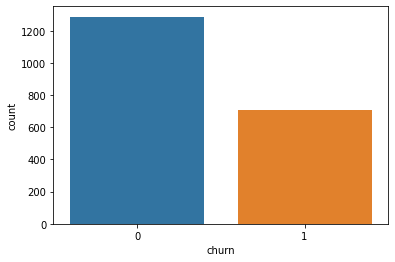

In [25]:
sns.countplot(df["churn"])

In [26]:
df.churn.value_counts(normalize=True)

0    0.644645
1    0.355355
Name: churn, dtype: float64

About 64% of the customers stayed without churning and 35% get churned. Therfore this is an Unbalanced dataset. 

In [27]:
#percentage of coustomers that are leaving (percentage estimated before introducing to the models)
dist1 = df[df.churn == 0].shape[0]
dist2 = df[df.churn == 1].shape[0]

print(dist1/(dist1+dist2)*100 , "% of customers stay with the company")
print(dist2/(dist1+dist2)*100 , "% of customers left from the company")

64.46446446446447 % of customers stay with the company
35.53553553553554 % of customers left from the company


#### Features Representation:

In [28]:
# make general plots to examine each feature with repect to churn feature
def plot_var2(col_name, full_name, continuous):
 
    # kde plot of the variables
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'churn', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='churn', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [29]:
ks_list = ['billing_complaint_count' ,'promotions', 'hotline_call_count','archade_visit_time', 'archade_visit_waiting_time' ,'archade_visit_count','negative_ratings_cx_sent' ,'positive_ratings_cx_sent', 'total_complaints','complaint_breach_count', 'coverage_related_complaint_count','download_bandwidth']

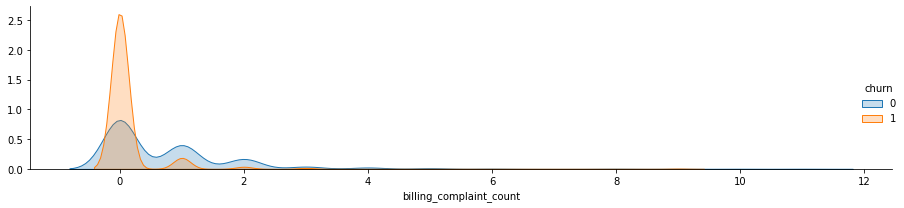

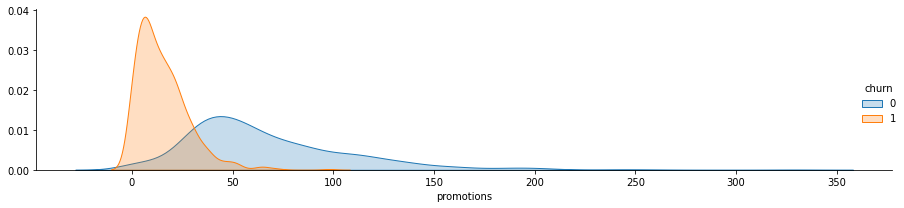

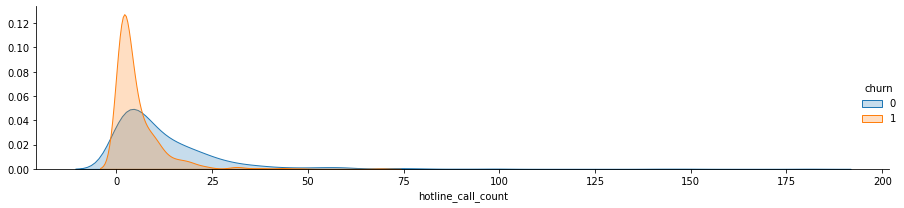

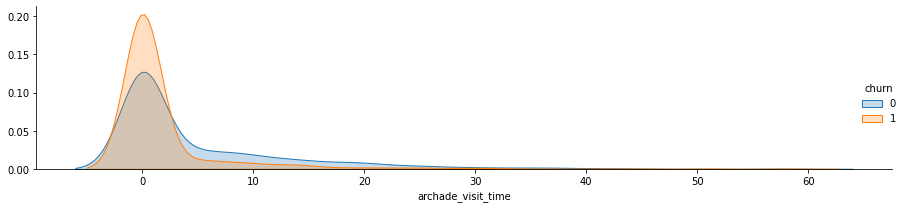

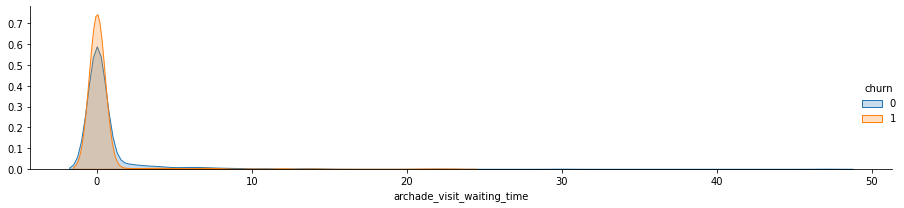

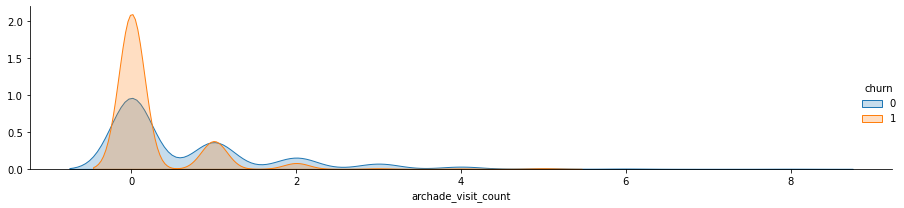

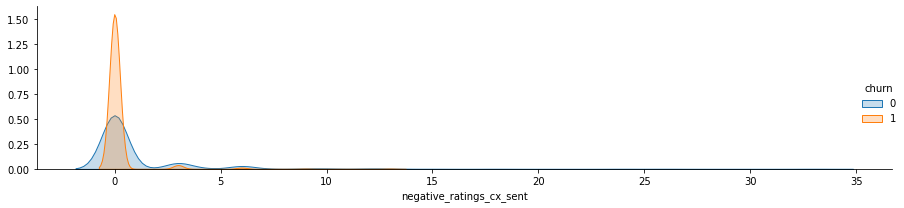

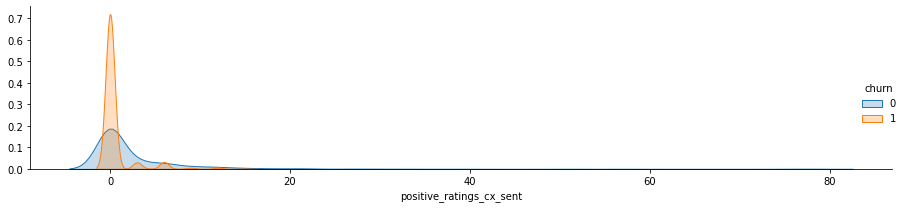

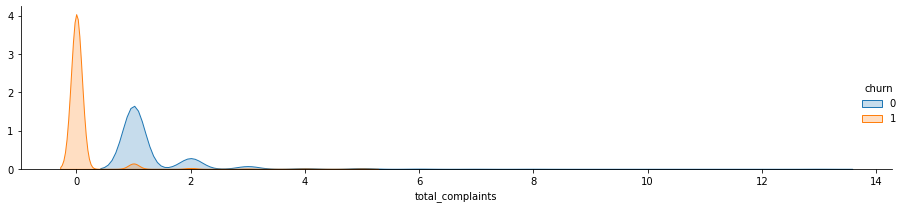

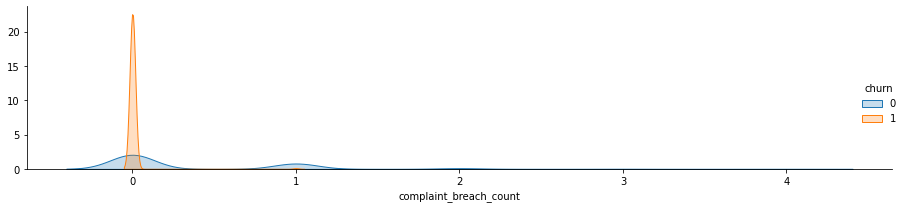

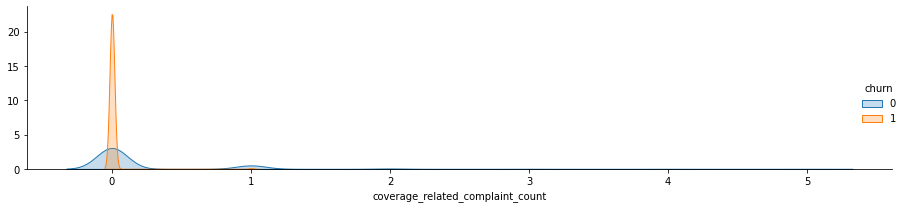

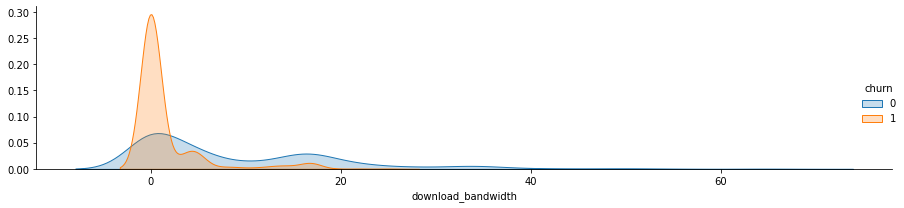

In [30]:
for plot_element in ks_list:
    plot_var2(plot_element,plot_element,continuous=True)

#### Feature creation

An overview of the features vs target variable..

    K-S is used to test on each feature to check whether the distributions of each feature of churn or not are drawn from the same distribution. 

In [31]:
df.groupby('churn').mean()

monthly_bill  billing_complaint_resolve_time  billing_complaint_count  \
churn                                                                          
0       5131.628882                       31.909161                 0.727484   
1       1438.308451                        0.694366                 0.119718   

       promotions  hotline_call_time  hotline_call_count  archade_visit_time  \
churn                                                                          
0       66.753882         265.666925           12.232143            4.791149   
1       15.163380         159.871831            5.288732            1.984507   

       archade_visit_waiting_time  archade_visit_count  \
churn                                                    
0                        0.627329              0.67236   
1                        0.311268              0.23662   

       negative_ratings_cx_sent  positive_ratings_cx_sent  \
churn                                                       
0                      0.910714                  2.556677   
1                      0.153521                  0.533803   

       complaint_resolve_duration  total_complaints  complaint_breach_count  \
churn                                                                         
0                       86.792702          1.305901                0.343944   
1                        1.938028          0.061972                0.004225   

       coverage_related_complaint_duration  coverage_related_complaint_count  \
churn                                                                          
0                                20.996894                          0.180901   
1                                 0.683099                          0.004225   

       adjustment_charges  download_bandwidth  downloaded_data  data_charges  
churn                                                                         
0              153.034938            9.134317       136.635870    135.679348  
1               69.429577            1.592958        64.950704     35.323944

#### Statistical overview

###### K-S test 

K-S should be a high value (Max =1.0) when the fit is good and a low value (Min = 0.0) when the fit is not good. 
When the K-S value goes below 0.05, you will be informed that the Lack of fit is significant.

In [32]:
def run_KS_test(feature):
    dist1 = df.loc[df.churn == 0,feature]
    dist2 = df.loc[df.churn == 1,feature]
    print('* ' + feature+ '  =>')
    print(ks_2samp(dist1,dist2),'\n')

In [33]:
ks_list = df[['monthly_bill','billing_complaint_resolve_time','billing_complaint_count','billing_complaint_count','promotions','hotline_call_time','hotline_call_count','archade_visit_time','archade_visit_waiting_time','archade_visit_count','negative_ratings_cx_sent','positive_ratings_cx_sent','complaint_resolve_duration','total_complaints','complaint_breach_count','coverage_related_complaint_duration','coverage_related_complaint_count','adjustment_charges','download_bandwidth','downloaded_data','data_charges']]

In [34]:
for ks_element in ks_list:
    run_KS_test(ks_element)

* monthly_bill  =>
KstestResult(statistic=0.5107624004898959, pvalue=2.3491286270895917e-111) 

* billing_complaint_resolve_time  =>
KstestResult(statistic=0.36696264543784446, pvalue=8.276164794268399e-56) 

* billing_complaint_count  =>
KstestResult(statistic=0.35648674656635465, pvalue=1.3514307875161939e-52) 

* billing_complaint_count  =>
KstestResult(statistic=0.35648674656635465, pvalue=1.3514307875161939e-52) 

* promotions  =>
KstestResult(statistic=0.763677718484822, pvalue=1.4968027617512387e-279) 

* hotline_call_time  =>
KstestResult(statistic=0.29796605721284225, pvalue=1.5099875882223737e-36) 

* hotline_call_count  =>
KstestResult(statistic=0.3188391216866416, pvalue=6.584863470789799e-42) 

* archade_visit_time  =>
KstestResult(statistic=0.21472530837197096, pvalue=5.157325140599097e-19) 

* archade_visit_waiting_time  =>
KstestResult(statistic=0.08473230688478699, pvalue=0.0025916163508308276) 

* archade_visit_count  =>
KstestResult(statistic=0.2106792931502056, pval

From the pvalues, we see that: **archade_visit_waiting_time**, **complaint_resolve_duration**, **total_complaints** return considerable high p-values.

The pvalues for other features are very low.

#### DEA (Data Envelopment Analysis)

#### Linear correlation between features and with the target variable ( in a heatmap)

<function matplotlib.pyplot.show(close=None, block=None)>

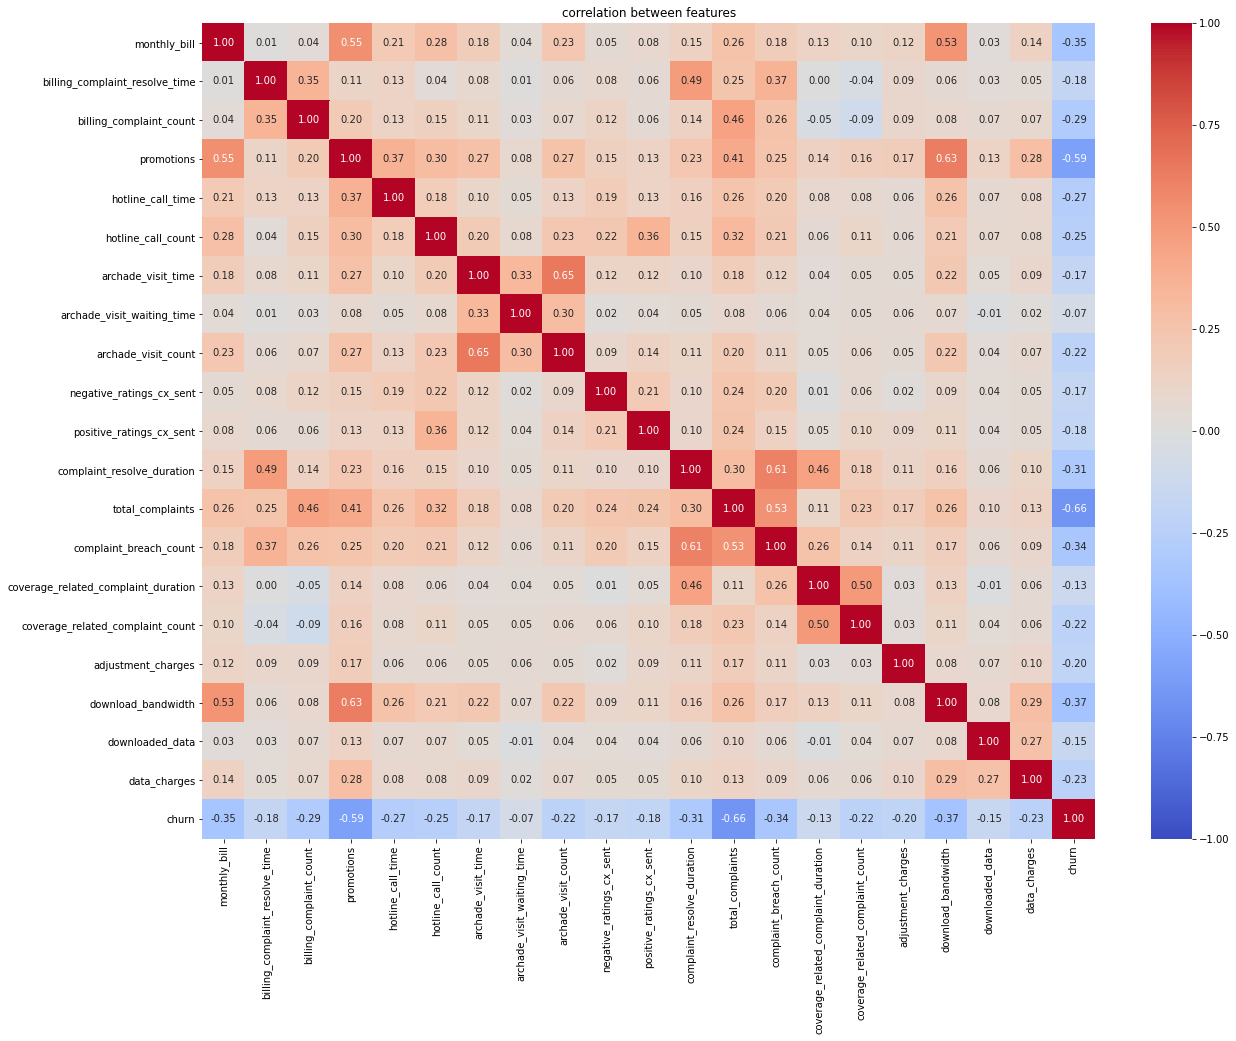

In [35]:
corr_matrix= df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, fmt = ".2f", cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("correlation between features")
plt.show

### coerrelation between churn (dependent variable ) and ;

* According to this, "churn" has a strong correlation with “total_complaints” , "promotions" ,  "promotions" , "complaint_breach_count" , "complaint_resolve_duration" , "billing_complaint_count" and  "hotline_call_time" respectively

* "archade_visit_time " has almost no correlation with “churn”.Since correlation is very close to zero, we can infer there is no linear relationship between these two predictors.

## 3. Feature Preprocessing

### 3.1 Split Data 

In [36]:
X=df.loc[:, df.columns != 'churn']
Y =df['churn']

In [37]:
# split dataset into train 70% , test 30% 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [38]:
print("Training datset   - ", "X_train -" ,len(X_train) , "| Y_train -" ,len(Y_train))
print("Testing datset    - ", "X_test  -" ,len(X_test) , " | Y_test -" ,len(Y_test))

Training datset   -  X_train - 1398 | Y_train - 1398
Testing datset    -  X_test  - 600  | Y_test - 600


### 3.2. Scale Data 

In [39]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(Y_train))
print (X_train)
print (X_test)

Feature space holds 1398 observations and 20 features
Unique target labels: [0 1]
      monthly_bill  billing_complaint_resolve_time  billing_complaint_count  \
0        -0.136619                       -0.248392                -0.528760   
1         1.444709                       -0.248392                -0.528760   
2         1.325573                       -0.248392                -0.528760   
3         0.207956                        0.358449                 0.502211   
4         0.625889                       -0.248392                 0.502211   
...            ...                             ...                      ...   
1393     -0.039701                       -0.248392                -0.528760   
1394     -0.022654                        0.326510                 0.502211   
1395      0.626272                       -0.248392                -0.528760   
1396     -0.523140                       -0.248392                -0.528760   
1397     -0.668900                       -0.24839

### 3.3. Balance Data 

Handle unbalance data using SMOTE technique.

In [40]:
# churn is the dependent variable for the churn prediction

print("churn feild has", len(df[col].unique()),"lables, 0 and 1")

churn feild has 2 lables, 0 and 1


In [41]:
print("before SMOTE: churn count for non churners and churners :", Counter(Y_train))

before SMOTE: churn count for non churners and churners : Counter({0: 900, 1: 498})


In [42]:
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_sample(X_train,Y_train)

In [43]:
print("churn attribute (dependent variable) count")
print("after SMOTE: churn count for non churners and churners :", Counter(Y_train))

print("\nShape of the entire training dataset")
print("Training dataset shape after SMOTE : ",Y_train.shape)

churn attribute (dependent variable) count
after SMOTE: churn count for non churners and churners : Counter({0: 900, 1: 900})

Shape of the entire training dataset
Training dataset shape after SMOTE :  (1800,)


## 4. Model Training 
* Implement machine learning pipelines consisting of several steps depending on the particular model that is being used

* Evaluate and compare the models using a cross-validated Area Under the Receiver Operating Characteristic Curve (AUROC)** score on the training set

* Perform some hyperparameter tuning for each model to choose the most promising model.

### 4.1. Churn prediction Models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier 

### 4.1.1. K-fold Cross-Validation

compared popular classifiers and evaluate their performance using a stratified kfold cross validation procedure.

- Logistic Regression 
- SVC
- KNN
- Random Forest (RFC)
- Decision Tree
- AdaBoost (Ada)
- Gradient Boosting (GBC)
- XGBoost

In [45]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

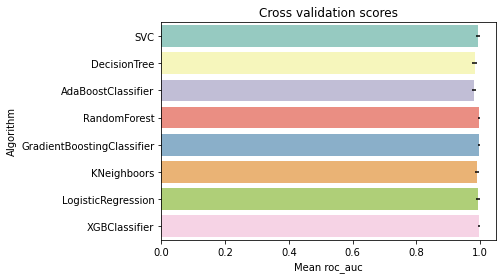

In [46]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoostClassifier",
"RandomForest","GradientBoostingClassifier","KNeighboors","LogisticRegression","XGBClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")


Higher the AUC, better the model is at distinguishing between customers who churn and not.
Decided to choose: SVC, RandomForest,logistic Regression, XGBoost,Gradient Boosting for further fine-tunning and the ensemble modeling

### 4.1.2. Hyperparameter tunning for best models
Use grid search optimization for the classifiers.

#### SVM

In [47]:
### SVC classifier
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [48]:
svm_best = grid_svm.best_estimator_
# Best score
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9939440092381637
Best parameters set: 
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [49]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

#### Random Forest

In [50]:
### RF classifier
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    7.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=20,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': range(2, 7),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(4, 10)},
             scoring='roc_auc', verbose=1)

In [51]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9973440106252752
Best parameters set: 
 {'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [52]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

#### Logistic Regression 

In [53]:
### Logistic Regression classifier

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, Y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00107152, 0.00114815, 0.00123027, 0.00131826,
       0.00141254, 0.00151356, 0.00162181, 0.0017378 , 0.00186209,
       0.00199526, 0.00213796, 0.00229087, 0.00245471, 0.00263027,
       0.00281838, 0.00301995, 0.00323594, 0.00346737, 0.00371535,
       0.00398107, 0.0042658 , 0.00457088, 0.00489779, 0.00524807,
       0.00562341, 0.00...
       0.12589254, 0.13489629, 0.14454398, 0.15488166, 0.16595869,
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 0.75857758, 0.81283052, 0.87096359, 0.9332543 ,
       1.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [54]:
lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.994279447513429
Best parameters set: 
 {'C': 0.029512092266663858, 'penalty': 'l2'}


In [55]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

#### Logistic Regression Model - Feature Selection Discussion 

#### Compare Feature Coefficients

In [56]:
LRmodel_l1 = LogisticRegression(penalty="none")
LRmodel_l1.fit(X_train, Y_train)
LRmodel_l1.coef_[0]
print("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]),X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1])):
    print(v + ": " + str(k))

Logistic Regression (L1) Coefficients
total_complaints: -6.5437
promotions: -3.5048
complaint_breach_count: -1.3523
negative_ratings_cx_sent: -0.9208
archade_visit_time: 0.7102
monthly_bill: -0.5504
archade_visit_count: -0.4046
download_bandwidth: -0.4045
adjustment_charges: -0.4033
data_charges: 0.3973
coverage_related_complaint_duration: -0.2676
complaint_resolve_duration: 0.26
coverage_related_complaint_count: -0.1559
billing_complaint_resolve_time: 0.1187
downloaded_data: -0.0907
hotline_call_time: 0.0807
archade_visit_waiting_time: 0.0768
positive_ratings_cx_sent: -0.0572
hotline_call_count: 0.0553
billing_complaint_count: 0.0066


In [57]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X_train, Y_train)
LRmodel_l2.coef_[0]
print("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1
])):
    print(v + ": " + str(k))

Logistic Regression (L2) Coefficients
total_complaints: -5.3056
promotions: -2.6954
complaint_breach_count: -0.9106
negative_ratings_cx_sent: -0.6151
archade_visit_time: 0.5704
monthly_bill: -0.4771
adjustment_charges: -0.3336
archade_visit_count: -0.3306
download_bandwidth: -0.3299
coverage_related_complaint_count: -0.2714
data_charges: 0.2157
billing_complaint_count: -0.1465
coverage_related_complaint_duration: -0.1266
positive_ratings_cx_sent: -0.0932
billing_complaint_resolve_time: 0.0878
downloaded_data: -0.0638
complaint_resolve_duration: 0.0582
archade_visit_waiting_time: 0.0454
hotline_call_count: -0.0429
hotline_call_time: 0.0364


####  Use Recursive Feature Elimination (RFE)

-Recursive feature elimination (RFE) - select features by recursively considering smaller and smaller sets of features.This is a feature selection method that fits a model and removes the weakest feature (or features).

In [58]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=1)
rfe_l1.fit(X_train, Y_train)
print("Logistic Regression (L1) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L1) RFE Result
total_complaints: 1
promotions: 2
negative_ratings_cx_sent: 3
complaint_breach_count: 4
monthly_bill: 5
archade_visit_time: 6
coverage_related_complaint_duration: 7
archade_visit_count: 8
adjustment_charges: 9
download_bandwidth: 10
data_charges: 11
complaint_resolve_duration: 12
coverage_related_complaint_count: 13
billing_complaint_resolve_time: 14
downloaded_data: 15
hotline_call_time: 16
archade_visit_waiting_time: 17
positive_ratings_cx_sent: 18
hotline_call_count: 19
billing_complaint_count: 20


In [59]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1)
rfe_l2.fit(X_train, Y_train)
print("Logistic Regression (L2) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L2) RFE Result
total_complaints: 1
promotions: 2
complaint_breach_count: 3
negative_ratings_cx_sent: 4
monthly_bill: 5
archade_visit_time: 6
archade_visit_count: 7
adjustment_charges: 8
coverage_related_complaint_count: 9
download_bandwidth: 10
data_charges: 11
billing_complaint_count: 12
billing_complaint_resolve_time: 13
positive_ratings_cx_sent: 14
coverage_related_complaint_duration: 15
downloaded_data: 16
complaint_resolve_duration: 17
archade_visit_waiting_time: 18
hotline_call_count: 19
hotline_call_time: 20


#### Gradient Boosting

In [60]:
# Gradient boosting tunning
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,Y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   23.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [61]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.9977455621096581
Best parameters set: 
 {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 150, 'n_estimators': 300}


In [62]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

#### XGBoost

In [63]:
# XGboost tunning
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:    9.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=4,
             param_grid={'learning_rate': [0.025, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'subsample': [0.25, 0.5, 1.0]},
             scoring='roc_auc', verbose=1)

In [64]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9974792713502492
Best parameters set: 
 {'learning_rate': 0.1, 'max_depth': 4, 'subsample': 1.0}


In [65]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

### 4.1.3. Comparing the best models
Take a closer look of the selected models: logistic Regression, Random Forest, Gradient Boosting, XGBoost and SVM using ;

- Learning Curve
- Confusion Matrix

#### (I) Plot learning curves


Learning curves are a good way to see the effect on the training set and the effect of the training size on the accuracy.

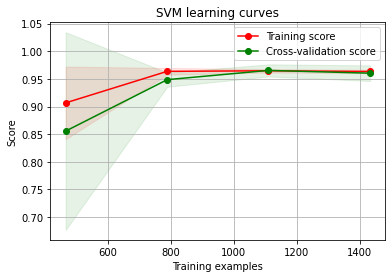

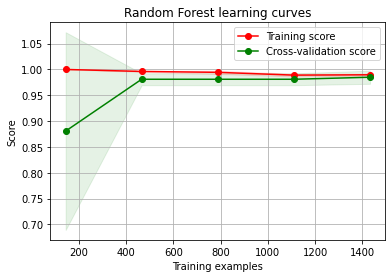

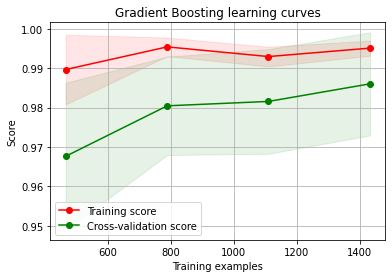

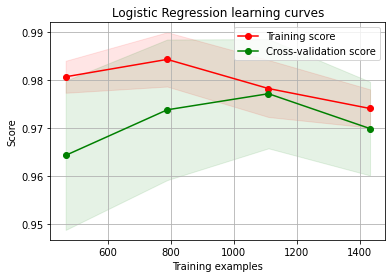

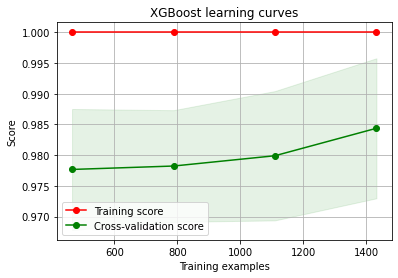

In [66]:
# Plot learning curves

def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)

In all the the algorithms , the testing acurracy has increased with the increased number of dataset

#### (II)Calculate Confusion Matrix (Precision, Recall, Accuracy, )

* Accuracy- the ratio of correct predictions to total predictions made. 
        accuracy = correct predictions / total predictions
* Precision- the ratio of correct positive predictions to the total predicted positives
* Recall (Sensitivity)- the ratio of correct positive predictions to the total positives examples.
* F -Measure -a single score that balances both the concerns of precision and recall in one number.It is the weighted harmonic mean of the test's precision and recall
* AUC ( Area Under The Curve) ROC (Receiver Operating Characteristics) curve) - It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between customers who churn and not.
        ranges in value from 0 to 1.
        Closer the value to 1 , higher the accuracy.

In [67]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Gradient Boosting
Accuracy is 0.9816666666666667
Precision is 1.0
Recall is 0.9471153846153846
F1 score is 0.9728395061728395
ROC AUC is 0.9894893053375197


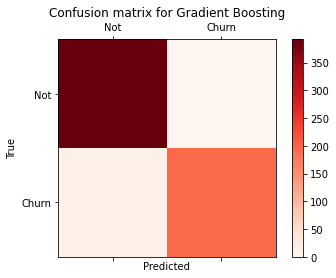

Logisitic Regression
Accuracy is 0.9666666666666667
Precision is 0.9476190476190476
Recall is 0.9567307692307693
F1 score is 0.9521531100478469
ROC AUC is 0.9785493524332808


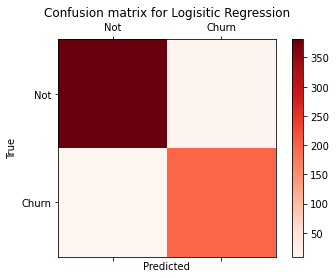

Random Forest
Accuracy is 0.9816666666666667
Precision is 1.0
Recall is 0.9471153846153846
F1 score is 0.9728395061728395
ROC AUC is 0.9900780023547879


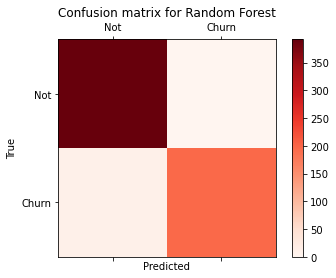

Support Vector Machine
Accuracy is 0.96
Precision is 0.9299065420560748
Recall is 0.9567307692307693
F1 score is 0.943127962085308
ROC AUC is 0.9784757653061225


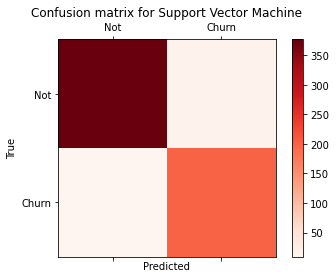

XGBoost Classifier
Accuracy is 0.9833333333333333
Precision is 0.995
Recall is 0.9567307692307693
F1 score is 0.9754901960784313
ROC AUC is 0.9880420918367345


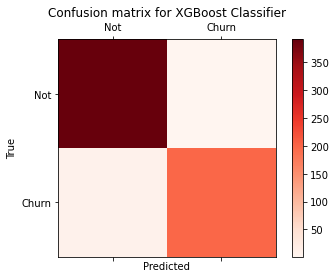

In [68]:
%matplotlib inline

y = np.array(Y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(Y_test, y_pred_gb), roc_auc_score(Y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(Y_test, y_pred_lr), roc_auc_score(Y_test, y_prob_lr)),
    ("Random Forest", confusion_matrix(Y_test, y_pred_rf), roc_auc_score(Y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(Y_test, y_pred_svm), roc_auc_score(Y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(Y_test, y_pred_xgb), roc_auc_score(Y_test, y_prob_xgb))
    
]
draw_confusion_matrices(confusion_matrices)


### 4.1.4 Feature importance of tree based classifiers
In order to see the most informative features for the prediction of the retention of the customers,
 - displayed the feature importance for the tree based classifiers.

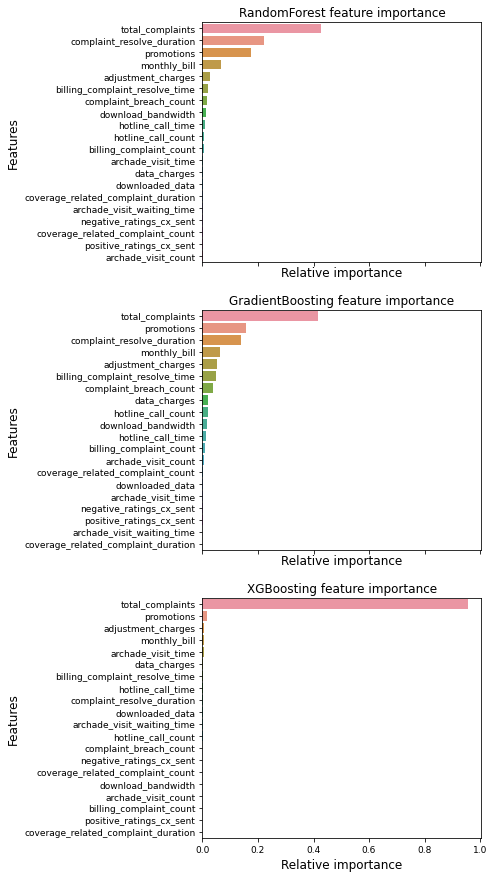

In [69]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("RandomForest",rf_best),("GradientBoosting",gb_best),("XGBoosting",xgb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

Plot the feature importance for the 3 tree based classifiers (Random Forest, Gradient Boosting, XG Boosting)

It is noticable that the four classifiers have top features according to the relative importance. Therefore their predictions are not based on the same features. 
Nevertheless, they share some common important features for the classification , for example "total_Complaints","Promotions" "complain_resolve_duration" and "adjustment_charges". 

For both Random Forest and Gradient Boosting, the "Download brandwidth","monthly_bill", "complain_breach _count" are also quite important and they are ranked in the plot. 

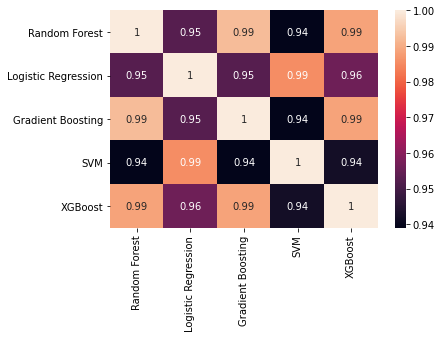

In [70]:
# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")


ensemble_results = pd.concat([test_rf, test_lr,test_gb, test_svm, test_xgb],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.

### 4.1.5. Ensemble modeling

voting classifier to combine the predictions coming from the 5 classifiers.

- pass argument as "soft" to the voting parameter to take probability of each vote into account.

In [71]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)

In [72]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.9833333333333333
Precision is 1.0
Recall is 0.9519230769230769
F1 score is 0.9753694581280787
ROC AUC is 0.9867665816326532


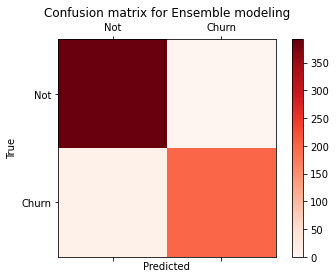

In [73]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(Y_test, y_pred_voting), roc_auc_score(Y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

## XG Boosting for predictions
Gradient Boosting is selected as the best model.
Gradient Boosting results are shown below.

XG Boosting
Accuracy is 0.9833333333333333
Precision is 0.995
Recall is 0.9567307692307693
F1 score is 0.9754901960784313
ROC AUC is 0.9880420918367345


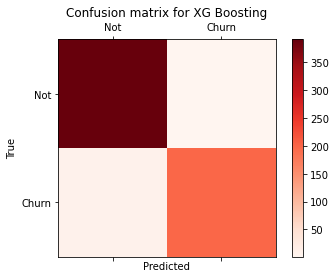

In [74]:
confusion_matrices = [
    ("XG Boosting", confusion_matrix(Y_test, y_pred_xgb), roc_auc_score(Y_test, y_prob_xgb))
]

draw_confusion_matrices(confusion_matrices)